# 2_Supervised_learing_model

Using the PCA anaysis to cut down the number of features to model, so the project would have the potential to model per cluster and decide whether a certian demographic would respond better to a mailout campaign.

In [22]:
import pandas as pd
import os
import numpy as np
import json
import imblearn
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.calibration import calibration_curve
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import ParameterGrid 
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pickle
import time

import PCA_functions
import Modeling_functions

In [3]:
mailout_train_clean = PCA_functions.load_clean('mailout_train_clean')

In [5]:
cluster_centers_df = pd.read_csv('data/cluster_centers_df.csv')

In [8]:
cols = list(cluster_centers_df.columns)
cols.remove('HH_DELTA_FLAG')
cols.remove('Unnamed: 0')
cols.append('RESPONSE')

In [9]:
mailout_train_clean = mailout_train_clean[cols]

In [10]:
mailout_train_clean.RESPONSE.sum()/mailout_train_clean.shape[0]*100

1.2414757824794544

1.24% conversion rate
- class bias
- using SMOTE from imblearn

In [13]:
param_grid = {'learning_rate' : [0.01, 0.05, 0.10, 0.15, 0.20, 0.25],
                'max_depth': [1,2,3,4,5,6,7],
                'min_child_weight': [2,3,4,5,6],
                'colsample_bytree': [0.60,0.65, 0.70, 0.75, 0.80, 0.85, 0.90],
                'gamma': [0, 0.1, 0.2, 0.4]
                }

cv_folds = 2

In [14]:
class_tech = XGBClassifier() # XGBClassifier by default

class_tech_sc = GridSearchCV(estimator = class_tech, 
                        param_grid = param_grid, 
                        cv = cv_folds, 
                        return_train_score = True, 
                        n_jobs=-1, 
                        scoring='neg_log_loss', 
                        verbose=10)

In [21]:
df_X, df_y, validate_set, y_validate = Modeling_functions.data_prep(mailout_train_clean, cols, 'RESPONSE', SMOTE_value=0.5 )


In [ ]:
# start = time.time()

# best_class_tech_sc = Modeling_functions.model_fit(class_tech_sc, df_X, df_y)

# end = time.time()
# print(end - start)

Fitting 2 folds for each of 5880 candidates, totalling 11760 fits
228863.65746665
The model gets saved and it took 2days and 16hr so I'm not running it again at a clean up stage.

In [23]:
best_class_tech_sc = pickle.load(open('Results/XGBoost_test_1.pkl', 'rb'))

c:\Users\Hannah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


graphic saved
results file created
model pickled


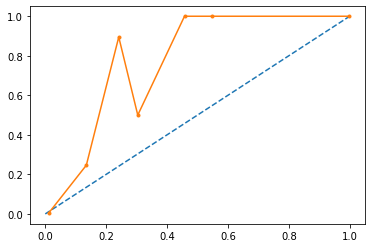

In [24]:
Modeling_functions.graphic_reliability(validate_set, best_class_tech_sc, y_validate, 'XGBoost_test_1')
Modeling_functions.results_to_text(best_class_tech_sc, validate_set, y_validate, df_X, param_grid, 'XGBoost_test_1')
Modeling_functions.save_model(best_class_tech_sc, 'XGBoost_test_1')

The max mean train score is -0.0021508678072083977.

The max mean test score is -0.02951969465658931.

The model predicted neg log loss on TEST is -0.02451040293835604.